   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

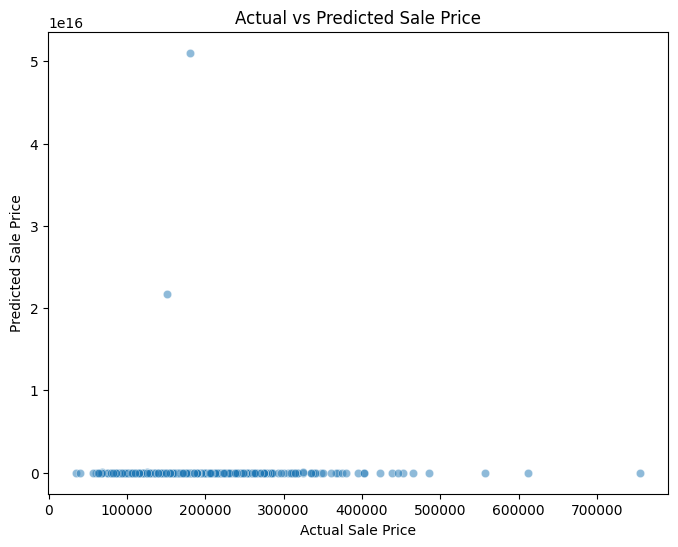

In [1]:
# 1. Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
url = "Dataset/train.csv"  # Gunakan dataset dari Kaggle jika ada
df = pd.read_csv(url)

# 3. Menampilkan Data Awal
print(df.head())

# 4. Menghapus Kolom yang Tidak Berguna
df.drop(columns=['Id'], inplace=True)  # Menghapus ID karena tidak relevan

# 5. Menangani Missing Values
# Menghitung jumlah missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values per column:\n", missing_values)

# Mengisi nilai numerik dengan median dan kategorikal dengan modus
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# 6. Encoding Variabel Kategorikal (One-Hot Encoding)
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 7. Memisahkan Fitur (X) dan Target (y)
X = df.drop(columns=['SalePrice'])  # Semua fitur kecuali target
y = df['SalePrice']

# 8. Split Data (70% Training, 30% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Normalisasi Data dengan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 10. Membangun Model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 11. Prediksi
y_pred = model.predict(X_test)

# 12. Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 13. Visualisasi Hasil
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.show()
